# Feature Selection - Part 1
## Understanding Feature Selection in Machine Learning

In this notebook, we'll explore Feature Selection techniques and their implementation in Python.

## What is Feature Selection?

Feature Selection is the process of automatically selecting the most relevant features (variables, predictors) for your model. It's a crucial step in the machine learning pipeline that:

1. Identifies the most important features
2. Removes irrelevant or redundant features
3. Reduces the dimensionality of your dataset
4. Improves model performance

## Why do we need Feature Selection?

Feature Selection is important for several reasons:

1. **Reduces Overfitting**: Fewer redundant features means less opportunity to make decisions based on noise
2. **Improves Accuracy**: Less misleading data means model accuracy improves
3. **Reduces Training Time**: Fewer features mean faster training
4. **Enhanced Generalization**: Reduces variance and helps avoid overfitting
5. **Better Interpretability**: Fewer features make it easier to explain the model's decisions

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold, f_classif, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [10]:
# Load sample dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("\nFeature names:\n", data.feature_names)
print("\nTarget feature name:", data.target_names)

Dataset shape: (569, 30)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target feature name: ['malignant' 'benign']


## Types of Feature Selection

There are three main types of feature selection methods:

1. **Filter Methods**: Use statistical measures to score features
2. **Wrapper Methods**: Use model performance to evaluate feature subsets
3. **Embedded Methods**: Perform feature selection during model training

In this notebook, we focus on Filter Methods.

## Filter-based Feature Selection

Filter methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features. These methods are:
- Computationally fast
- Independent of the learning algorithm
- Usually univariate

Let's explore different filter methods:

### 1. Duplicate Features

First, let's check for duplicate features in our dataset.

In [3]:
# Check for duplicate features
def find_duplicates(df):
    duplicates = {}
    columns = df.columns
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            if df[columns[i]].equals(df[columns[j]]):
                duplicates[columns[j]] = columns[i]
    
    return duplicates

duplicates = find_duplicates(X)
print("Duplicate features:", duplicates if duplicates else "None found")

Duplicate features: None found


### Information Gain
Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

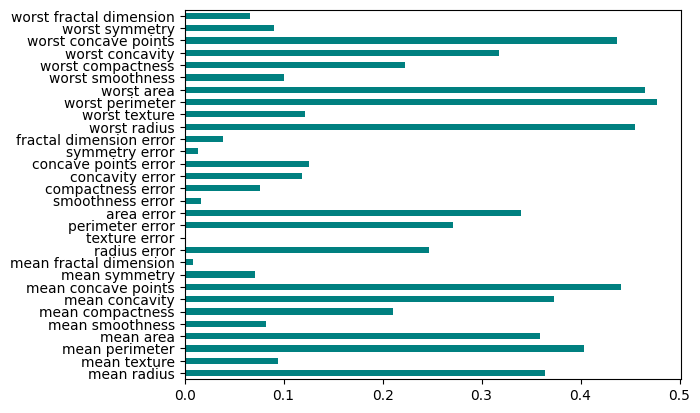

In [20]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

### 2. Variance Threshold

Variance Threshold is a simple baseline approach to feature selection. It removes features whose variance doesn't meet a certain threshold.

In [4]:
# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_scaled = StandardScaler().fit_transform(X)
X_var_selected = selector.fit_transform(X_scaled)

# Get selected features
selected_features = X.columns[selector.get_support()].tolist()

print("Original number of features:", X.shape[1])
print("Number of selected features:", len(selected_features))
print("\nSelected features:\n", selected_features)

Original number of features: 30
Number of selected features: 30

Selected features:
 ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


### 3. Correlation Analysis

Correlation analysis helps identify redundant features by measuring the linear correlation between features.

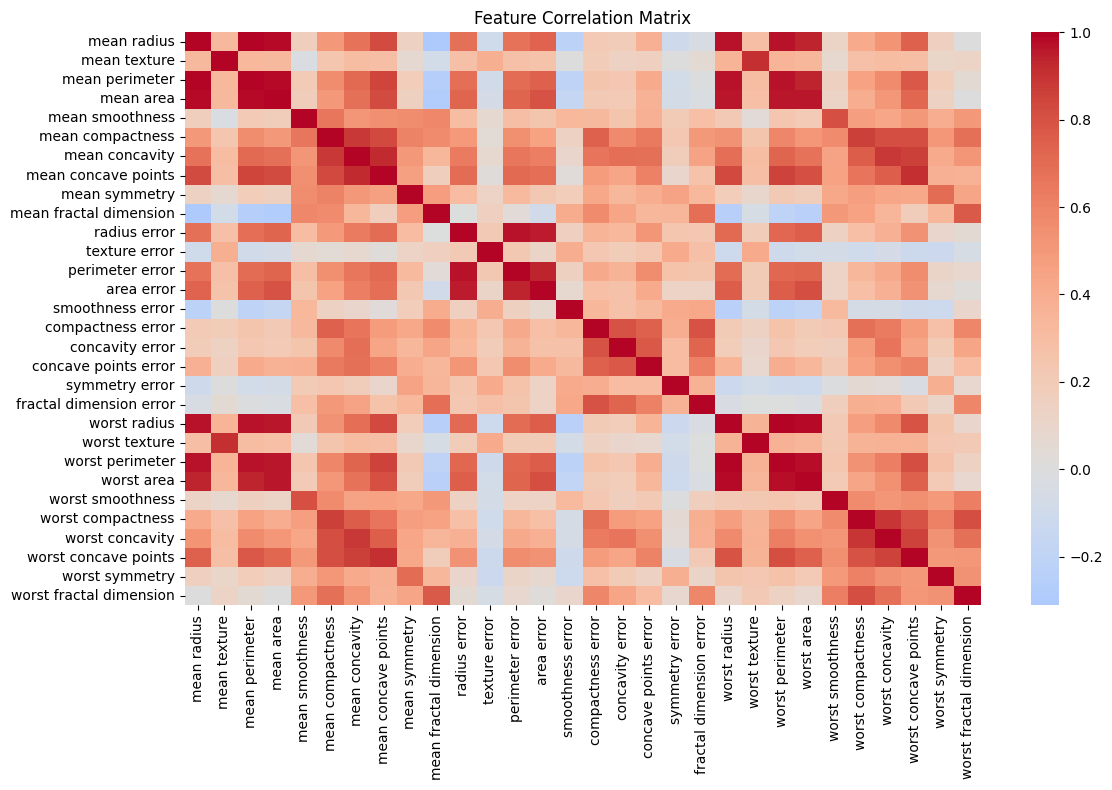


Highly correlated features (>0.9):

              Feature 1             Feature 2  Correlation
0           mean radius        mean perimeter     0.997855
1           mean radius             mean area     0.987357
2           mean radius          worst radius     0.969539
3           mean radius       worst perimeter     0.965137
4           mean radius            worst area     0.941082
5          mean texture         worst texture     0.912045
6        mean perimeter             mean area     0.986507
7        mean perimeter          worst radius     0.969476
8        mean perimeter       worst perimeter     0.970387
9        mean perimeter            worst area     0.941550
10            mean area          worst radius     0.962746
11            mean area       worst perimeter     0.959120
12            mean area            worst area     0.959213
13       mean concavity   mean concave points     0.921391
14  mean concave points  worst concave points     0.910155
15         radius e

In [5]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find highly correlated features
def find_high_correlations(correlation_matrix, threshold=0.9):
    high_corr = np.where(np.abs(correlation_matrix) > threshold)
    high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                 for x, y in zip(*high_corr) if x != y and x < y]
    return pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])

high_correlations = find_high_correlations(correlation_matrix)
print("\nHighly correlated features (>0.9):\n")
print(high_correlations)

### 4. ANOVA (Analysis of Variance)

ANOVA is used to determine the statistical significance of features for classification problems.

Top 10 features by ANOVA F-score:

                 Feature     F Score        P Value
27  worst concave points  964.385393  1.969100e-124
22       worst perimeter  897.944219  5.771397e-119
7    mean concave points  861.676020  7.101150e-116
20          worst radius  860.781707  8.482292e-116
2         mean perimeter  697.235272  8.436251e-101
23            worst area  661.600206   2.828848e-97
0            mean radius  646.981021   8.465941e-96
3              mean area  573.060747   4.734564e-88
6         mean concavity  533.793126   9.966556e-84
26       worst concavity  436.691939   2.464664e-72


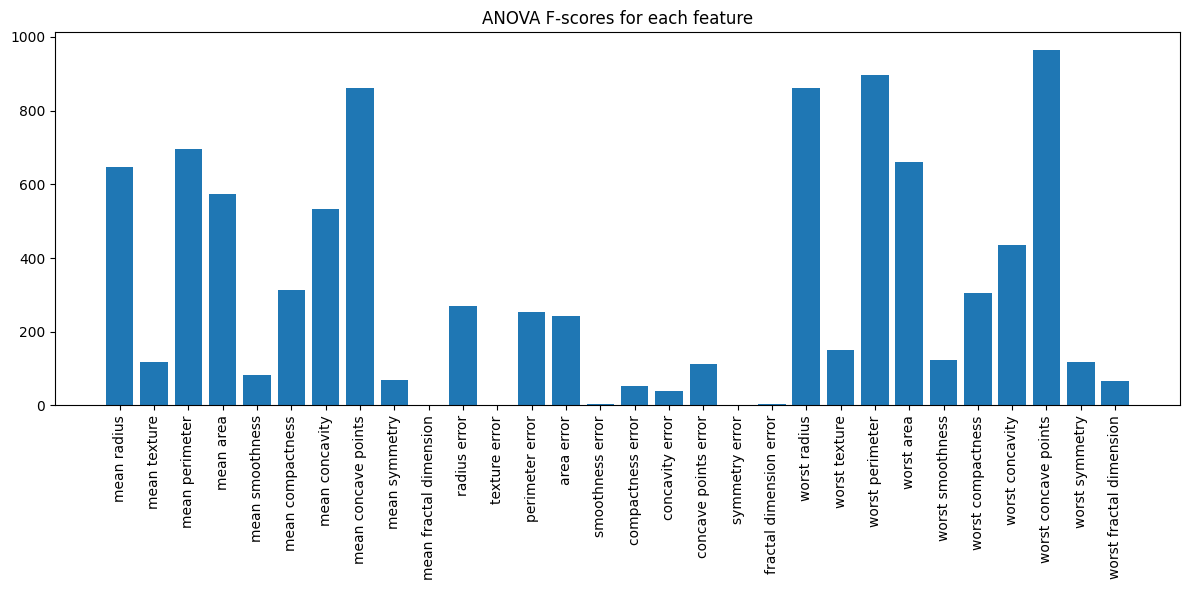

In [14]:
# Apply ANOVA F-test
f_scores, p_values = f_classif(X_scaled, y)

# Create DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F Score': f_scores,
    'P Value': p_values
})

# Sort by F-score
feature_scores = feature_scores.sort_values('F Score', ascending=False)
print("Top 10 features by ANOVA F-score:\n")
print(feature_scores.head(10))

# Plot F-scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(f_scores)), f_scores)
plt.xticks(range(len(f_scores)), X.columns, rotation=90)
plt.title('ANOVA F-scores for each feature')
plt.tight_layout()
plt.show()

### 5. Chi-Square Test

Chi-Square test is another statistical test for feature selection, particularly useful for categorical features.

In [15]:
# Apply Chi-Square test
# Note: Chi-square requires non-negative values, so we use MinMaxScaler
X_scaled_positive = MinMaxScaler().fit_transform(X)
chi_scores, chi_p_values = chi2(X_scaled_positive, y)

# Create DataFrame with feature scores
chi_feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi_scores,
    'P Value': chi_p_values
})

# Sort by Chi-Square score
chi_feature_scores = chi_feature_scores.sort_values('Chi-Square Score', ascending=False)
print("Top 10 features by Chi-Square score:\n")
print(chi_feature_scores.head(10))

Top 10 features by Chi-Square score:

                 Feature  Chi-Square Score       P Value
7    mean concave points         52.405743  4.514020e-13
27  worst concave points         46.341648  9.933002e-12
6         mean concavity         46.186395  1.075210e-11
23            worst area         35.043882  3.223582e-09
22       worst perimeter         34.438091  4.400270e-09
20          worst radius         34.124937  5.168467e-09
26       worst concavity         31.563031  1.930704e-08
3              mean area         29.328594  6.108761e-08
2         mean perimeter         26.528902  2.596246e-07
0            mean radius         24.897293  6.046728e-07


## Advantages and Disadvantages of Filter Methods

### Advantages:
1. **Fast**: Computationally efficient
2. **Scalable**: Can handle large datasets
3. **Independent**: Works independently of the learning algorithm
4. **Univariate**: Each feature is considered independently

### Disadvantages:
1. **Ignores Feature Dependencies**: Doesn't account for feature interactions
2. **Ignores Learning Algorithm**: May select features that aren't optimal for the specific model
3. **Redundancy**: May select redundant features (unless explicitly checked)
4. **Arbitrary Thresholds**: Often requires manual threshold setting